<a href="https://colab.research.google.com/github/darishkhan/Numerical-Linear-Algebra-Lab/blob/main/Assignmnet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
import scipy.linalg
import matplotlib.pyplot as plt

In [ ]:
def bdSubs_m(L, b):
  n = len(L[0])
  ans = []
  for i in range(n-1,-1,-1):
    k = b[i]
    for j in range(n-1,i,-1):
      k -= L[i,j] * ans[n-j-1]
    ans.append(k/L[i,i])
  return np.array(np.flip(ans))

def fdSubs_m(L, b):
  ans=[]
  n = len(L[0])
  for i in range(n):
    k=b[i]
    for j in range(i):
      k -= L[i,j]*ans[j]
    ans.append(k/L[i,i])
  return np.array(ans)

def LSSNE(A,b,m,n):
  AT = np.transpose(A)
  C = np.dot(AT,b)
  D = np.dot(AT,A)
  U = scipy.linalg.cholesky(D, lower = False)
  L = scipy.linalg.cholesky(D, lower = True)
  T = fdSubs_m(L,C)
  x = bdSubs_m(U,T)
  x = x.reshape(n,1)
  return x


In [ ]:
def GramSelf_m(A, b):
  m,n=np.shape(A)
  R = np.zeros((A.shape[1], A.shape[1]))
  Q = np.zeros(A.shape)
  for k in range(0, A.shape[1]):
      R[k, k] = np.sqrt(np.dot(A[:, k], A[:, k]))
      Q[:, k] = A[:, k]/R[k, k]
      for j in range(k+1, A.shape[1]):
          R[k, j] = np.dot(Q[:, k], A[:, j])
          A[:, j] = A[:, j] - R[k, j]*Q[:, k]

  X = fdSubs_m(R, np.transpose(Q)@b)
  X = X.reshape(n,1)
  return X


In [ ]:
def column_convertor(x):
  x.shape = (1, x.shape[0])
  return x

def householder_transformation(v):
  size_of_v = v.shape[1]
  e1 = np.zeros_like(v)
  e1[0, 0] = 1
  vector = np.linalg.norm(v) * e1
  if v[0, 0] < 0:
    vector = - vector
  u = (v + vector).astype(np.float32)
  H = np.identity(size_of_v) - ((2 * np.matmul(np.transpose(u), u)) / np.matmul(u, np.transpose(u)))
  return H

def qr_step_factorization(q, r, iter, n):
  v = column_convertor(r[iter:, iter])
  Hbar = householder_transformation(v)
  H = np.identity(n)
  H[iter:, iter:] = Hbar
  r = np.matmul(H, r)
  q = np.matmul(q, H)
  return q, r

def HouseSelf_m(A, b):
  n, m = np.shape(A)
  Q = np.identity(n)
  R = A.astype(np.float32)
  for i in range(min(n, m)):
    Q, R = qr_step_factorization(Q, R, i, n)
  min_dim = min(m, n)
  R = np.around(R, decimals=6)
  R = R[:min_dim, :min_dim]
  Q = np.around(Q, decimals=6)
  X = fdSubs_m(R, np.transpose(Q)@b)
  X = X.reshape(m,1)
  return X


f(x) = c1.x + c2


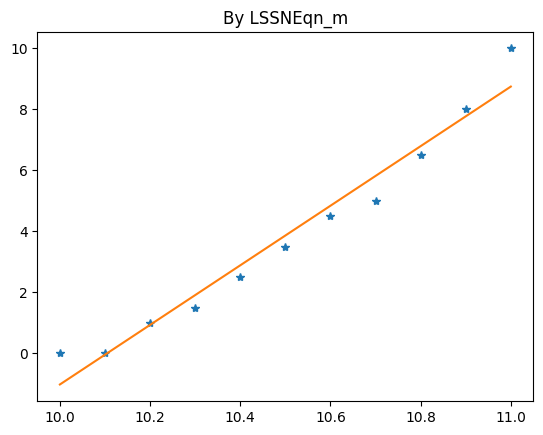

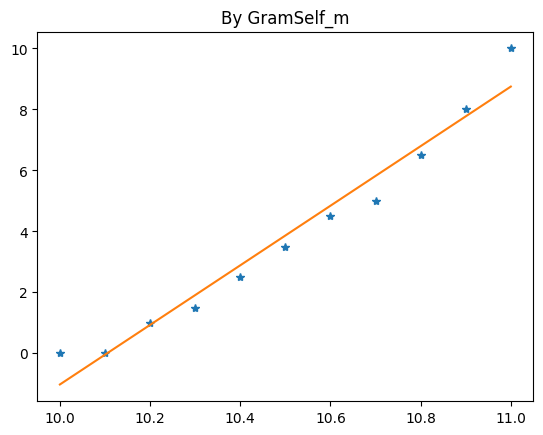

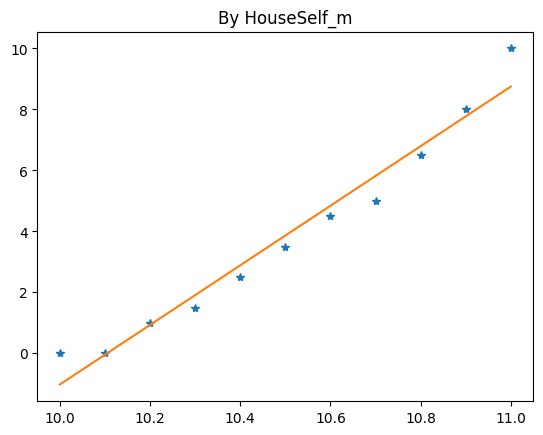

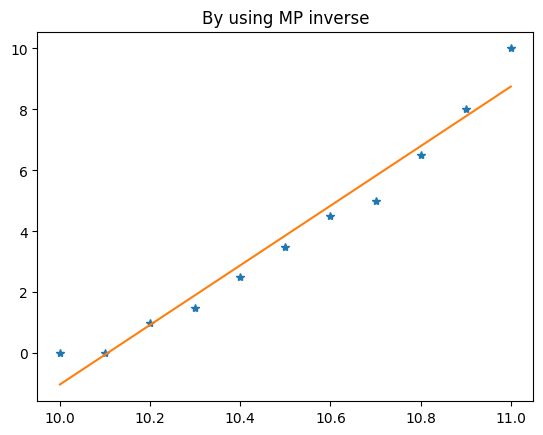

f(x) = c1.x^2 + c2.x + c3


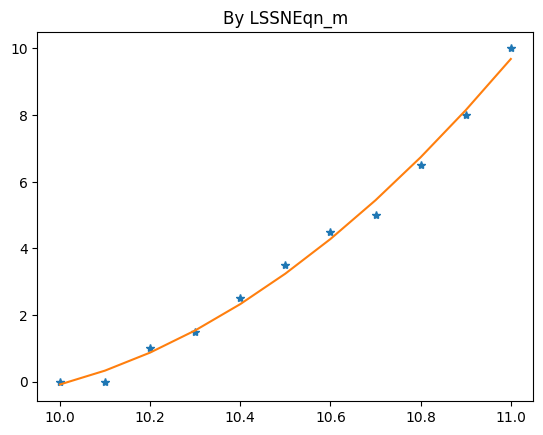

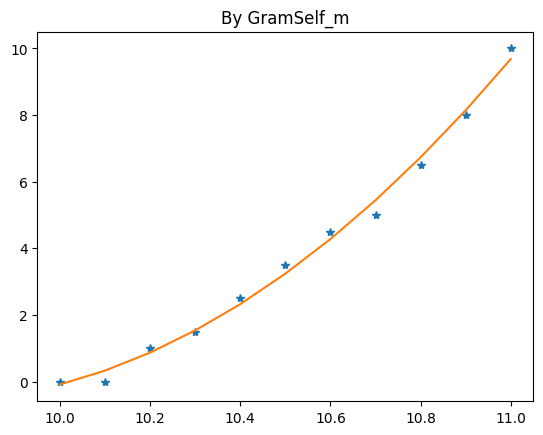

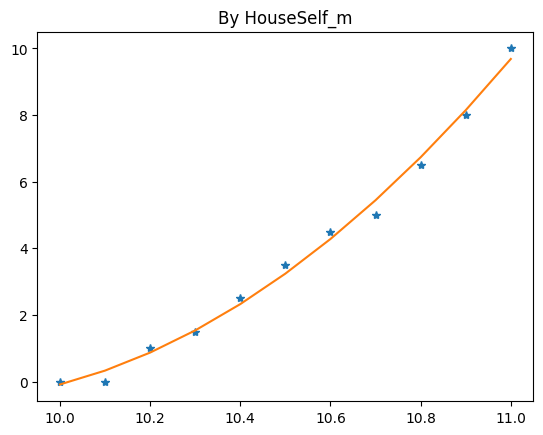

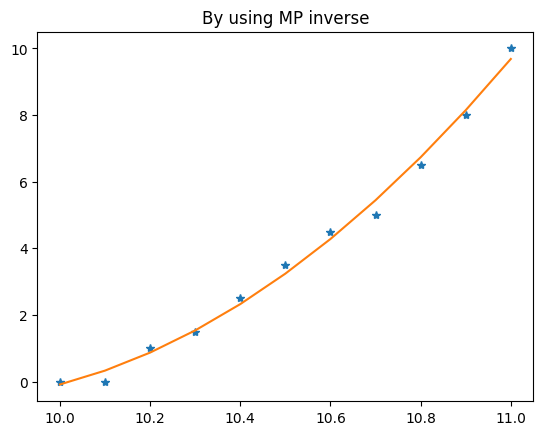

In [ ]:
y = np.array([0, 0, 1, 1.5, 2.5, 3.5, 4.5, 5, 6.5, 8, 10])
x = np.array([10, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11])

# ---------------------------------------
# For best fit line f(x) = c1x + c2
# ---------------------------------------
A = np.ones((11,2))
for i in range(11):
  A[i,0] = x[i]
print("\n\nf(x) = c1.x + c2")

# By using Least square solution
ans = LSSNE(A, y, 11, 2)
plt.plot(x, y, '*')
plt.title("By LSSNEqn_m")
plt.plot(x, A@ans)
plt.savefig("figure 1")
plt.show()

# By using Gram Schmidt QR decompostion
ans = GramSelf_m(A, y)
plt.plot(x, y, '*')
plt.title("By GramSelf_m")
plt.plot(x, A@ans)
plt.savefig("figure 2")
plt.show()

# By using Householder QR decomposition
ans = HouseSelf_m(A, y)
plt.plot(x, y, '*')
plt.title("By HouseSelf_m")
plt.plot(x, A@ans)
plt.savefig("figure 3")
plt.show()

# By using Moore Penrose Inverse
U, sigma, Vt = np.linalg.svd(A)
sigma = 1/sigma
nsigma = np.zeros((2, 11))
for i in range(2):
  nsigma[i,i]=sigma[i]
Ainv = np.transpose(Vt)@nsigma@np.transpose(U)
ans = Ainv@y
plt.plot(x, y, '*')
plt.title("By using MP inverse")
plt.plot(x, A@ans)
plt.savefig("figure 4")
plt.show()


# ---------------------------------------------
# for best fit curve f(x) = c1x^2 + c2x + c3
# ---------------------------------------------
A = np.ones((11,3))
for i in range(11):
  A[i,0] = x[i]**2
  A[i,1] = x[i]
print("\n\nf(x) = c1.x^2 + c2.x + c3")

# By using Least square solution
ans = LSSNE(A, y, 11, 3)
plt.plot(x, y, '*')
plt.title("By LSSNEqn_m")
plt.plot(x, A@ans)
plt.savefig("figure 5")
plt.show()

# By using Gram Schmidt QR decompostion
ans = GramSelf_m(A, y)
plt.plot(x, y, '*')
plt.title("By GramSelf_m")
plt.plot(x, A@ans)
plt.savefig("figure 6")
plt.show()

# By using Householder QR decomposition
ans = HouseSelf_m(A, y)
plt.plot(x, y, '*')
plt.title("By HouseSelf_m")
plt.plot(x, A@ans)
plt.savefig("figure 7")
plt.show()

# By using Moore Penrose Inverse
U, sigma, Vt = np.linalg.svd(A)
sigma = 1/sigma
nsigma = np.zeros((3, 11))
for i in range(3):
  nsigma[i,i]=sigma[i]
Ainv = np.transpose(Vt)@nsigma@np.transpose(U)
ans = Ainv@y
plt.plot(x, y, '*')
plt.title("By using MP inverse")
plt.plot(x, A@ans)
plt.savefig("figure 8")
plt.show()
